# Subway Data Analysis

## Introdução

O sistema de ônibus e trens de Nova Iorque - o Metro Transit Authority - fornece seus dados para download através de  arquivos csv. Uma das informações disponíveis são os dados das catracas do metrô que contém logs semanais de entradas cumulativas e saídas por catraca por estação de metrô em algum intervalo de tempo.

Neste projeto iremos utilizar apenas os das catraca disponíveis em: http://web.mta.info/developers/turnstile.html.

# Sobre este projeto

Neste projeto você irá aplicar todos os conhecimentos adquiridos neste primeiro mês de curso. Iremos praticar tarefas básicas de aquisição, limpeza de dados e nesse processo iremos descobrir coisas essenciais sobre os dados utilizando o que foi aprendido no curso de estatística. 

O objetivo deste projeto é explorar a relação entre os dados das catracas do metro de Nova Iorque e o clima no dia da coleta. Para isso, além dos dados do metrô, precisaremos os dados de clima da cidade de Nova Iorque. 

Os principais pontos que serão verificados neste trabalho:

- Coleta de dados da internet
- Utilização de estatística para análise de dados
- Manipulação de dados e criação de gráficos simples com o Pandas

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Seção 1 - Coleta de Dados

### Exercicio 1.1

Mãos a obra!! Agora é sua vez de coletar os dados. Escreva abaixo um código python que acesse o link http://web.mta.info/developers/turnstile.html e baixe os arquivos do mês de junho de 2017. O arquivo deverá ser salvo com o nome turnstile_100617.txt onde 10/06/17 é a data do arquivo.

Abaixo seguem alguns comandos que poderão te ajudar:

Utilize a biblioteca **urllib** para abrir e resgatar uma página da web. Utilize o comando abaixo onde **url** será o caminho da página da web onde se encontra o arquivo:

```python
u = urllib.urlopen(url)
html = u.read()
```

Utilize a biblioteca **BeautifulSoup** para procurar na página pelo link do arquivo que deseja baixar. Utilize o comando abaixo para criar o seu objeto *soup* e procurar por todas as tags 'a'no documento:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

Uma dica para baixar apenas os arquivos do mês de junho é verificar a data no nome do arquivo. Por exemplo, para baixar o arquivo do dia 17/06/2017 verifique se o link termina com *"turnstile_170610.txt"*. Se não fizer isso você baixará todos os arquivos da página. Para fazer isso utilize o comando conforme abaixo:

```python
if '1706' in link.get('href'):
```

E a dica final é utilizar o comando abaixo para fazer o download do arquivo txt:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Lembre-se, primeiro, carregue todos os pacotes e funções que você estará usando em sua análise.

In [3]:
import os
print(os.listdir('data'))

['full_data.txt', 'turnstile_171202.txt', 'turnstile_171209.txt', 'turnstile_171216.txt', 'turnstile_171223.txt', 'turnstile_171230.txt', 'turnstile_180106.txt', 'turnstile_180113.txt', 'turnstile_180120.txt', 'turnstile_180127.txt', 'turnstile_180203.txt', 'turnstile_180210.txt', 'turnstile_180217.txt', 'turnstile_180224.txt', 'turnstile_180303.txt', 'turnstile_180310.txt', 'turnstile_180317.txt', 'turnstile_180324.txt', 'turnstile_180331.txt', 'turnstile_180407.txt', 'turnstile_180414.txt', 'turnstile_180421.txt', 'turnstile_180428.txt', 'turnstile_180505.txt', 'turnstile_180512.txt', 'turnstile_180519.txt', 'turnstile_180526.txt', 'turnstile_180602.txt', 'turnstile_180609.txt', 'turnstile_180616.txt', 'turnstile_180623.txt', 'turnstile_180630.txt', 'turnstile_180707.txt', 'turnstile_180714.txt', 'turnstile_180721.txt', 'turnstile_180728.txt', 'turnstile_180804.txt', 'turnstile_180811.txt', 'turnstile_180818.txt', 'turnstile_180825.txt']


In [4]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

base_path = "http://web.mta.info/developers/"
url = f"{base_path}turnstile.html/"
u = urlopen(url)
html = u.read()

soup = BeautifulSoup(html, "html.parser")
container = soup.find('div', { 'class': 'container'})
links = container.find_all('a')



for link in links:
    partial_path = link.get('href')
        full_path = f"{base_path}{partial_path}"
        filename = partial_path.split("/")[-1]
        urlretrieve(full_path, f"data/{filename}")

### Exercicio 1.2

Escreva uma função que pegue a lista de nomes dos arquivos que você baixou no exercicio 1.1 e consolide-os em um único arquivo. Deve existir apenas uma linha de cabeçalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:

linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:

linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'

linha 1...
linha 2...
linha 3...
linha 4...
linha 5...

In [5]:
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            with open(filename) as partial_file:
                for line in partial_file:
                    master_file.write(line)
import os
days = os.listdir('data')

filenames = []
for d in days:
    filenames.append(f"data/{d}")

create_master_turnstile_file(filenames, "data/full_data.txt")

### Exercicio 1.3

Neste exercício, escreva um função que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta função deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe deverá ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [6]:
import pandas as pd   
turnstile_data = pd.read_csv("data/full_data.txt", dtype=object)
turnstile_data = turnstile_data[turnstile_data['DESCn'] == 'REGULAR']
turnstile_data.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/25/2017,03:00:00,REGULAR,0006418978,0002171818 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/25/2017,07:00:00,REGULAR,0006418985,0002171833 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/25/2017,11:00:00,REGULAR,0006419051,0002171911 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/25/2017,15:00:00,REGULAR,0006419204,0002171962 ...
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/25/2017,19:00:00,REGULAR,0006419478,0002172011 ...


### Transformação de campo date string para datetime

In [7]:
turnstile_data[' DATEn'] = turnstile_data[' DATEn'].str.replace('/','-')
turnstile_data[' DATEn'] = pd.to_datetime(turnstile_data[' DATEn'])

### Criação de colunas year, month e day no dataframe

In [8]:
turnstile_data['YEARn'] = turnstile_data[' DATEn'].dt.year
turnstile_data['MONTHn'] = turnstile_data[' DATEn'].dt.month
turnstile_data['DAYn'] = turnstile_data[' DATEn'].dt.day

### Renomeando nomes das colunas a fim de limpar os espaços

In [9]:
turnstile_data = turnstile_data.rename(columns={' LINENAME': 'LINENAME', ' DIVISION': 'DIVISION', ' DATEn': 'DATEn'})

### Exercicio 1.4

Os dados do metrô de NY possui dados cumulativos de entradas e saidas por linha. Assuma que você possui um dataframe chamado df que contém apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A função abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a última leitura (entradas desde a última linha do dataframe).

Mais especificamente, você deverá fazer duas coisas:

1 - Criar uma nova coluna chamada ENTRIESn_hourly
2 - Inserir nessa coluna a diferença enre ENTRIESn da coluna atual e a da coluna anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funções do pandas shift() e fillna() pode ser úteis nesse exercicio.

In [10]:
diff = pd.to_numeric(turnstile_data['ENTRIESn']) - pd.to_numeric(turnstile_data['ENTRIESn'].shift(1))
turnstile_data['ENTRIESn_hourly'] = diff.fillna(1).astype(int)

### Exercicio 1.5

Faça o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferença entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.

In [11]:
diff = pd.to_numeric(turnstile_data['EXITSn']) - pd.to_numeric(turnstile_data['EXITSn'].shift(1))
turnstile_data['EXITSn_hourly'] = diff.fillna(0).astype(int)

### Exercicio 1.6

Dado uma variável de entrada que representa o tempo no formato de "00:00:00" (hora: minutos: segundos)
    
Escreva uma função para extrair a parte da hora do tempo variável de entrada. E devolva-o como um número inteiro. Por exemplo:
         
 * 1) se a hora for 00, seu código deve retornar 0
 * 2) se a hora for 01, seu código deve retornar 1
 * 3) se a hora for 21, seu código deve retornar 21
        
Por favor, devolva a hora como um número inteiro.

In [12]:
turnstile_data['HOUR'] = turnstile_data['TIMEn'].map(lambda x: int(x.split(':')[0]))

## Exercicio 2 - Análise dos dados

### Exercicio 2.1

Para verificar a relação entre o movimento do metrô e o clima, precisaremos complementar os dados do arquivo já baixado com os dados do clima.
Nós complementamos para você este arquivo com os dados de clima de Nova Iorque  e disponibilizamos na área de materiais do projeto. Você pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um código python que leia este arquivo e salve-o em um data frame do pandas.

In [1]:
import pandas as pd
masterwithweather = pd.read_csv("turnstile_data_master_with_weather.csv", dtype=object)

#----------------------------------
#Transformação para númerica contínua
#----------------------------------
masterwithweather['mintempi'] = masterwithweather['mintempi'].astype('float64')
masterwithweather['meantempi'] = masterwithweather['meantempi'].astype('float64')
masterwithweather['maxtempi'] = masterwithweather['maxtempi'].astype('float64')
masterwithweather['meanwindspdi'] = masterwithweather['meanwindspdi'].astype('float64')
masterwithweather['meanpressurei'] = masterwithweather['meanpressurei'].astype('float64')
masterwithweather['mindewpti'] = masterwithweather['mindewpti'].astype('float64')
masterwithweather['maxdewpti'] = masterwithweather['maxdewpti'].astype('float64')
masterwithweather['maxpressurei'] = masterwithweather['maxpressurei'].astype('float64')
masterwithweather['precipi'] = masterwithweather['precipi'].astype('float64')

#--------------------------------
# Transformação para númerica
masterwithweather['ENTRIESn_hourly'] = pd.to_numeric(masterwithweather['ENTRIESn_hourly'])
# Transformação para númerica
masterwithweather['EXITSn_hourly'] = pd.to_numeric(masterwithweather['ENTRIESn_hourly'])
# Transformação para datetime
masterwithweather['DATEn'] = pd.to_datetime(masterwithweather['DATEn'])
# Transformação para númerica
masterwithweather['Hour'] = pd.to_numeric(masterwithweather['Hour'])

### Exercicio 2.2

Agora crie uma função que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* é igual a 1.

Dica: Você também pode achar que a interpretação de números como números inteiros ou float pode não funcionar inicialmente. Para contornar esta questão, pode ser útil converter esses números para números inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro). Então, por exemplo, se queríamos lançar a coluna maxtempi como um número inteiro, nós devemos escrever algo como cast (maxtempi as integer) = 76, em oposição a simplesmente onde maxtempi = 76.

In [2]:
masterwithweather['rain'] = pd.to_numeric(masterwithweather['rain'])
num = len(masterwithweather[masterwithweather.rain == 1].groupby('DATEn'))

### Exercicio 2.3

Calcule se estava nebuloso ou não (0 ou 1) e a temperatura máxima para fog (isto é, a temperatura máxima para dias nebulosos).

In [43]:
# Agrupando por fog(dias nubolosos) e retornado com a temperatura máxima
masterwithweather.groupby(['fog'])['maxtempi'].max()

fog
0.0    86.0
1.0    81.0
Name: maxtempi, dtype: float64

### Exercicio 2.4

Calcule agora a média de 'meantempi' nos dias que são sábado ou domingo (finais de semana):

In [35]:
masterwithweather['weekday'] = pd.to_datetime(masterwithweather['DATEn']).dt.dayofweek
filtered_data = masterwithweather['meantempi'].astype(float)[masterwithweather['weekday'] >= 5]
mean_temp_weekends = filtered_data.mean()
print("A média de meantempi nos dias que são finais de semana é: ", mean_temp_weekends)

A média de meantempi nos dias que são finais de semana é:  65.10066685403307


### Exercicio 2.5

Calcule a média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus:

In [4]:
filtered_data = masterwithweather['mintempi'][masterwithweather['rain'] == 1][masterwithweather['mintempi'] > 55]
avg_min_temp_rainy = filtered_data.mean()
print("A temperatura média nos dias chuvosos onde a temperatura é maior que 55 graus é:", avg_min_temp_rainy)

A temperatura média nos dias chuvosos onde a temperatura é maior que 55 graus é: 61.238860398860396


### Exercicio 2.6

Antes de realizar qualquer análise, pode ser útil olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metrô de Nova York para determinar a distribuição dos dados. Estes dados são armazenados na coluna ['ENTRIESn_hourly'].
    
Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando não está chovendo.

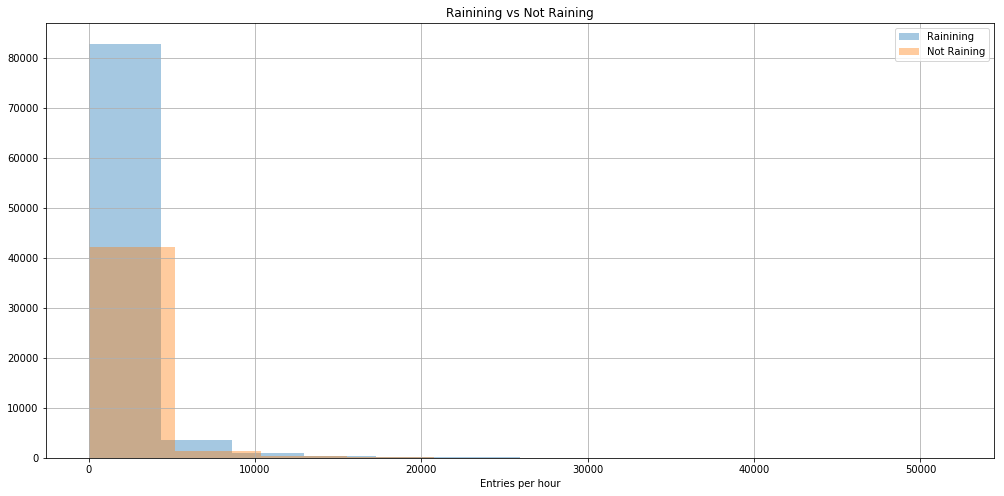

In [42]:
# Alterando o tamanho padrão da visualização de dados
plt.figure(figsize=(17,8))

# Convertendo as variaveis em métricas contínuas
masterwithweather['ENTRIESn_hourly'] = pd.to_numeric(masterwithweather['ENTRIESn_hourly'])
masterwithweather['rain'] = pd.to_numeric(masterwithweather['rain'])

# Filtrando os dias que estão chovendo vs os dias que não estão chovendo
masterwithweather[masterwithweather['rain'] == 0]['ENTRIESn_hourly'].hist(alpha = 0.4)
masterwithweather['ENTRIESn_hourly'][masterwithweather.rain == 1].hist(alpha = 0.4)

# Atributos gerais da visualização de dados
plt.title("Rainining vs Not Raining")
plt.legend(('Rainining','Not Raining'))
plt.xlabel("Entries per hour")
plt.show()

### Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuição? Existe diferença na distribuição entre dias chuvosos e não chuvosos?

**Resposta:**
Em ambos os casos, uma distribuição não-normal é visualizada, cuja maior concentração de dados observados (moda) se concentra na extremidade esquerda do gráfico, caracterizando assim uma distribuição inclinada (assimétrica) positiva.

### Exercicio 2.8
Construa uma função que retorne:

1. A média das entradas com chuva
2. A média das entradas sem chuva

In [40]:
with_rain_mean = masterwithweather['ENTRIESn_hourly'][masterwithweather['rain'] == 1].mean()
print("A média dos dias com chuva, de acordo com o dataset disponível é: ", with_rain_mean)

A média dos dias com chuva, de acordo com o dataset disponível é:  1105.4463767458733


In [41]:
without_rain_mean = masterwithweather['ENTRIESn_hourly'][masterwithweather['rain'] == 0].mean()
print("A média dos dias sem chuva, de acordo com o dataset disponível é: ", without_rain_mean)

A média dos dias sem chuva, de acordo com o dataset disponível é:  1090.278780151855


## Exercício 3 - Map Reduce

### Exercicio 3.1

A entrada para esse exercício e o mesmo arquivo da seção anterior (Exercicio 2). Você pode baixar o arquivo neste link:

https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saída do mapeador deve IMPRIMIR (não retornar) a UNIT como uma chave e o número de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissão. O código para exportar seu mapeador já está escrito no código abaixo.


In [17]:
import sys

def mapper():

    for line in sys.stdin:
        data = line.strip().split(",")
        
        if len(data) >= 7:
            unit = data[1]
            entries = data[6]
        
            print(f"{unit}\t{entries}")

sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')
mapper()

### Exercicio 3.2

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir(Não retornar) uma linha por UNIT, juntamente com o número total de ENTRIESn_hourly.Ao longo de maio (que é a duração dos nossos dados), separados por uma guia. Um exemplo de linha de saída do redutor pode ser assim: 'R001 \ t500625.0'

Você pode assumir que a entrada para o redutor está ordenada de tal forma que todas as linhas correspondentes a uma unidade particular são agrupados. No entanto a saida do redutor terá repetição pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissão.

In [18]:
def reducer():
    entriesTotal = 0
    oldKey = None

    for line in sys.stdin:
        data_mapped = line.strip().split("\t")
        if len(data_mapped) != 2:
            continue
        
        thisKey, thisEntry = data_mapped
        
        try:
            thisEntry_to_f = float(thisEntry)
            if oldKey and oldKey != thisKey:
                print(f"{oldKey}\t{entriesTotal}")
                oldKey = thisKey
                entriesTotal = 0
            
            oldKey = thisKey
            entriesTotal += thisEntry_to_f
        except ValueError:
            pass
            
sys.stdin = open('mapper_result.txt')
sys.stdout = open('reducer_result.txt', 'w')
reducer()